<a href="https://colab.research.google.com/github/ImalkaPrasadini/Bigdata_Spark/blob/main/With%20Suggestions%205%2C6_Traffic_Violations_Maryland_Task_5_%26_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Violation Analysis**

# **Download Java**

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#  **Install Apache Spark 3.0.1 with Hadoop 2.7**

In [5]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# **Unzip Folder**

In [6]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# **Install Find Spark**

> It will locate Spark on the system and import it as a regular library.



In [7]:
!pip install -q findspark

# **Settin up Envirnmental Variables**


> This will enable us to run Pyspark in the Colab environment.



In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [9]:
import findspark
findspark.init()

In [10]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

# **Import dataset from the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

# **Loading data to PySpark**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as f
from pyspark.sql.functions import *
from pyspark.sql.types import DateType

In [12]:
# Load data to Task 1.
data = spark.read.csv('/content/sample_data/DataSet.csv',header=True)
data.show()

+------------+------------+--------------------+--------------------+-----+---------------+---------------+-------+---------------+----+-----------+--------------+-----------------------+
|Date Of Stop|Time Of Stop|           SubAgency|            Location|Belts|Personal Injury|Property Damage|Alcohol|    VehicleType| _c9|       Make|Violation Type|Contributed To Accident|
+------------+------------+--------------------+--------------------+-----+---------------+---------------+-------+---------------+----+-----------+--------------+-----------------------+
|  09/24/2013|    17:11:00|3rd district, Sil...|     8804 FLOWER AVE|   No|             No|             No|     No|02 - Automobile|null|       FORD|      Citation|                     No|
|  08/29/2017|    10:19:00|2nd district, Bet...|WISCONSIN AVE@ EL...|   No|             No|             No|     No|02 - Automobile|null|     TOYOTA|      Citation|                     No|
|  12/01/2014|    12:52:00|6th district, Gai...|CHRISTOPHER 

### **5. The number of accidents which occur due to traffic violations based on vehicle type**

+--------------------+-----------------------+-------------------+
|         VehicleType|Contributed To Accident|Number of Accidents|
+--------------------+-----------------------+-------------------+
|     02 - Automobile|                    Yes|                566|
|05 - Light Duty T...|                    Yes|                 21|
|          28 - Other|                    Yes|                  7|
|06 - Heavy Duty T...|                    Yes|                  4|
|08 - Recreational...|                    Yes|                  2|
+--------------------+-----------------------+-------------------+



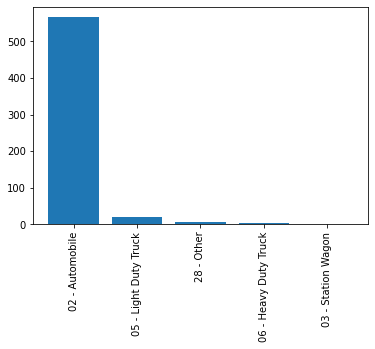

In [13]:
# Select relevent columns
df_task1 = data.select('VehicleType','Contributed To Accident')
# df_task1.show()

# Filter the data where accidents occur
df_task1 = df_task1.where(df_task1['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task1.groupby(["VehicleType","Contributed To Accident"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data = group_data.sort(col('Number of Accidents').desc()).limit(5)

# Dipaly Data
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Chart
plt.bar(df_pandas["VehicleType"],df_pandas["Number of Accidents"])
plt.xticks(rotation=90)

# visualize chart
plt.show()


### **6. Identify the correlation between accidents and time of the day**

+----+-----------------------+-------------------+
|hour|Contributed To Accident|Number of Accidents|
+----+-----------------------+-------------------+
|   0|                    Yes|                 62|
|   1|                    Yes|                 69|
|   2|                    Yes|                 27|
|   3|                    Yes|                578|
|   4|                    Yes|                146|
|   5|                    Yes|                  5|
|   6|                    Yes|                169|
|   7|                    Yes|                 32|
|   8|                    Yes|                 33|
|   9|                    Yes|                 61|
|  10|                    Yes|                 94|
|  11|                    Yes|                 43|
|  12|                    Yes|                 77|
|  13|                    Yes|                 82|
|  14|                    Yes|                106|
|  15|                    Yes|                113|
|  16|                    Yes| 

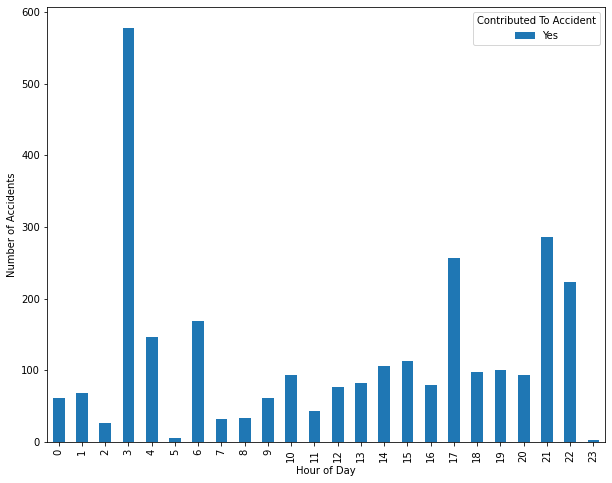

In [135]:
# Select relevent columns
df_task15 = data.select('Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

#Sort above based on time
#sorted=group_data.orderBy('Time Of Stop')
#sorted.show()

# Here contain 24hr clock. To get more simple consider only the hour that accident is happened. 
#Take the hour for each timestamp
sorted = (df_task15.select("Time Of Stop").withColumn("hour", hour("Time Of Stop")))


#Join above datafrmaes by outter join.
df = df_task15.join(sorted, on=['Time Of Stop'], how='outer')



# Group data from Vehicle type.
group_data = df.groupby(["hour","Contributed To Accident"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data=group_data.sort('hour')

# Dipaly Data
group_data.show()


# Chart
# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")


# Visualize the data
plt.show()


**How change according to the day(Weekend or Weekday)**

In [175]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
from pyspark.sql.window import Window

# Select relevent columns
df_task15 = data.select('Date Of Stop','Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

# Filter the day of week where accidents occur
d_day= df_task15.select(hour("Time Of Stop").alias('hour'),from_unixtime(unix_timestamp('Date Of Stop', 'MM/dd/yyyy')).alias('date'),'Contributed To Accident')
d_day.withColumn("Day", date_format(col("date"), "EEEE")).show()

# Group data from Vehicle type.
group_data = d_day.groupby(["hour","Contributed To Accident"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data=group_data.sort('hour').show



+----+---------+-----------------------+
|hour|     date|Contributed To Accident|
+----+---------+-----------------------+
|  17|   Monday|                    Yes|
|  14| Thursday|                    Yes|
|  14|   Monday|                    Yes|
|   9| Saturday|                    Yes|
|  18| Thursday|                    Yes|
|  15|   Sunday|                    Yes|
|  21|   Friday|                    Yes|
|   7| Thursday|                    Yes|
|  11|  Tuesday|                    Yes|
|   3|   Sunday|                    Yes|
|  15|   Sunday|                    Yes|
|  12|   Friday|                    Yes|
|  16|  Tuesday|                    Yes|
|  12| Saturday|                    Yes|
|  14|   Friday|                    Yes|
|  14|   Friday|                    Yes|
|   4|   Sunday|                    Yes|
|  13|  Tuesday|                    Yes|
|  16| Saturday|                    Yes|
|  14|Wednesday|                    Yes|
+----+---------+-----------------------+
only showing top

+----+---------+-----------------------+
|hour|     date|Contributed To Accident|
+----+---------+-----------------------+
|  17|   Monday|                    Yes|
|  14| Thursday|                    Yes|
|  14|   Monday|                    Yes|
|   9| Saturday|                    Yes|
|  18| Thursday|                    Yes|
|  15|   Sunday|                    Yes|
|  21|   Friday|                    Yes|
|   7| Thursday|                    Yes|
|  11|  Tuesday|                    Yes|
|   3|   Sunday|                    Yes|
|  15|   Sunday|                    Yes|
|  12|   Friday|                    Yes|
|  16|  Tuesday|                    Yes|
|  12| Saturday|                    Yes|
|  14|   Friday|                    Yes|
|  14|   Friday|                    Yes|
|   4|   Sunday|                    Yes|
|  13|  Tuesday|                    Yes|
|  16| Saturday|                    Yes|
|  14|Wednesday|                    Yes|
+----+---------+-----------------------+
only showing top

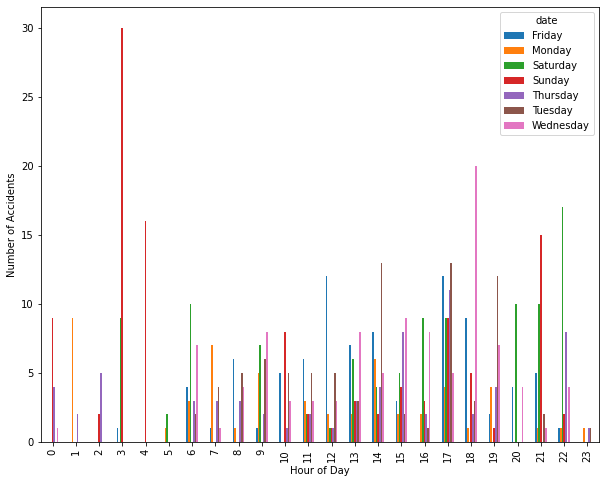

<Figure size 432x288 with 0 Axes>

In [209]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
from pyspark.sql.window import Window

# Select relevent columns
df_task15 = data.select('Date Of Stop','Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

# Filter the day of week where accidents occur
d_day= df_task15.select(hour("Time Of Stop").alias('hour'),from_unixtime(unix_timestamp('Date Of Stop', 'MM/dd/yyyy')).alias('date'),'Contributed To Accident')
d_day = d_day.withColumn("date", date_format(col("date"), "EEEE"))
d_day.show()
d_day = new.sort('hour')
# Group data.
d_day = d_day.groupby(["hour","date"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data = d_day.sort('hour')
group_data.show()


# Chart
# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="date",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")


# Visualize the data
plt.show()

#Save
plt.savefig("output.png")
